In [ ]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [ ]:
!pip install umap-learn

In [ ]:
metadata = pd.read_csv('metadata_for_ALL.csv')
metadata.head()

,Unnamed: 0,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,contact_country,supplementary_file,supplementary_file.1,data_row_count,assay name:ch1,disease:ch1,extract name:ch1,provider:ch1,tissue:ch1,tumor grade:ch1
0,GSM2899178,900_00_1961,GSM2899178,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,00715851_T,astrocytoma,00715851_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 2
1,GSM2899179,900_00_5308,GSM2899179,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03421899_T,astrocytoma,03421899_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 3
2,GSM2899180,900_00_5382,GSM2899180,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03437595_T,astrocytoma,03437595_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 2
3,GSM2899181,900_00_5385,GSM2899181,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03441740_T,astrocytoma,03441740_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 3
4,GSM2899182,900_00_5459,GSM2899182,Public on May 25 2018,Dec 22 2017,May 27 2018,RNA,1,brain,Homo sapiens,...,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2899...,54613,03461078_T,astrocytoma,03461078_T,THOMAS JEFFERSON UNIVERSITY,brain,grade 3


In [ ]:
metadata = metadata[["Unnamed: 0", "disease:ch1"]]
metadata

,Unnamed: 0,disease:ch1
0,GSM2899178,astrocytoma
1,GSM2899179,astrocytoma
2,GSM2899180,astrocytoma
3,GSM2899181,astrocytoma
4,GSM2899182,astrocytoma
...,...,...
545,GSM2899723,glioblastoma multiforme
546,GSM2899724,glioblastoma multiforme
547,GSM2899725,glioblastoma multiforme
548,GSM2899726,glioblastoma multiforme


In [ ]:
metadata.rename(columns={'Unnamed: 0':'sample_name'}, inplace=True)
metadata = metadata.set_index('sample_name', drop=False).rename_axis(None)
metadata = metadata.iloc[: , 1:]
metadata

,disease:ch1
GSM2899178,astrocytoma
GSM2899179,astrocytoma
GSM2899180,astrocytoma
GSM2899181,astrocytoma
GSM2899182,astrocytoma
...,...
GSM2899723,glioblastoma multiforme
GSM2899724,glioblastoma multiforme
GSM2899725,glioblastoma multiforme
GSM2899726,glioblastoma multiforme


In [ ]:
metadata["disease:ch1"].value_counts()

glioblastoma multiforme    228
astrocytoma                148
oligodendroglioma           67
unknown                     67
normal                      28
mixed                       11
unclassified                 1
Name: disease:ch1, dtype: int64

In [ ]:
df = pd.read_csv('expressions_for_ALL.csv')
df

,Unnamed: 0,GSM2899178,GSM2899179,GSM2899180,GSM2899181,GSM2899182,GSM2899183,GSM2899184,GSM2899185,GSM2899186,...,GSM2899718,GSM2899719,GSM2899720,GSM2899721,GSM2899722,GSM2899723,GSM2899724,GSM2899725,GSM2899726,GSM2899727
0,1007_s_at,13.351463,13.029612,12.204373,13.220731,12.800696,12.998188,12.535824,13.293149,13.099153,...,12.254284,13.382465,12.094031,13.175054,13.022445,12.951104,12.833660,11.870599,11.363593,12.566863
1,1053_at,8.384527,8.711418,7.607350,8.565974,8.153348,8.025304,7.905967,8.236557,8.369683,...,8.099996,9.055313,7.734170,8.009634,8.613445,8.464073,8.555682,7.531668,8.156820,7.769310
2,117_at,7.257650,7.288016,7.502815,7.091462,7.145189,7.245728,6.966852,7.257414,7.335077,...,7.857018,7.038607,8.109119,7.316860,7.923470,8.176689,7.325877,7.183132,10.277372,7.920370
3,121_at,9.693855,9.419995,9.766347,9.696563,9.541857,9.651808,9.465553,9.597624,9.614943,...,9.594196,9.345226,9.518884,9.495419,9.490949,9.451931,9.631344,9.411834,9.569866,9.580727
4,1255_g_at,4.757011,4.779778,4.667598,4.851953,4.681551,4.733220,5.438050,4.744499,4.505551,...,5.531101,4.716083,5.044052,4.736672,4.762489,4.699940,4.965802,5.194529,4.797065,4.828818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,1561927_at,4.334395,4.313351,4.333109,4.299748,4.241566,4.168089,4.228405,4.247901,4.315887,...,4.226139,4.246845,4.092024,4.238180,4.217313,4.133777,4.156201,4.357875,4.361390,4.327281
6308,1561928_s_at,6.736355,6.571371,6.730391,6.452160,6.586365,6.709657,6.788441,6.621722,6.588179,...,6.532441,6.698887,6.579938,6.677570,6.705156,6.613191,6.679510,6.747866,6.902249,6.621045
6309,1561937_x_at,8.796191,8.596690,8.739100,8.827874,8.921628,8.738996,8.453247,8.772500,8.928947,...,8.437829,8.733740,8.490095,8.641583,8.393748,8.713619,8.740054,8.792655,9.162672,9.044822
6310,1561938_at,4.779713,4.918444,4.784342,4.953460,4.848039,4.971286,7.588660,4.747435,4.827523,...,4.756063,4.764646,4.755489,4.816004,4.564555,4.814661,4.897520,5.217713,4.926541,4.714856


In [ ]:
df.rename(columns={'Unnamed: 0':'probe_id'}, inplace=True)
df_transposed = df.T
df_transposed = df_transposed.rename(columns=df_transposed.iloc[0])
df_transposed.drop(index=df_transposed.index[0], 
        axis=0, 
        inplace=True)
df_transposed

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,13.351463,8.384527,7.25765,9.693855,4.757011,9.564984,7.20268,6.469576,5.433951,5.812061,...,11.75248,11.434393,13.384794,13.251027,5.161074,4.822047,4.427799,4.322635,4.65894,4.88583
GSM2899179,13.029612,8.711418,7.288016,9.419995,4.779778,8.70894,6.926967,6.727661,5.516571,5.477696,...,11.444639,11.176989,13.302898,13.120261,5.100207,4.832563,4.242714,4.248731,4.698449,4.827256
GSM2899180,12.204373,7.60735,7.502815,9.766347,4.667598,7.765518,7.213711,6.380055,5.130731,6.366044,...,11.703096,11.435066,13.575426,13.370573,5.467172,5.113913,4.44973,4.363435,4.825065,4.861275
GSM2899181,13.220731,8.565974,7.091462,9.696563,4.851953,8.421737,6.940979,6.702834,4.921485,5.206217,...,11.689559,11.414037,13.51681,13.315342,5.20009,4.863638,4.330211,4.374541,4.738313,4.91411
GSM2899182,12.800696,8.153348,7.145189,9.541857,4.681551,8.848753,6.975687,6.003315,4.979548,6.252752,...,11.638172,11.302682,13.258296,13.202009,5.311042,4.868711,4.386464,4.430018,4.721205,4.765831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899723,12.951104,8.464073,8.176689,9.451931,4.69994,8.431166,6.960206,6.331347,6.832752,5.582707,...,11.502376,11.350212,13.274868,13.153766,5.258645,4.87616,4.276804,4.369978,4.664675,4.884514
GSM2899724,12.83366,8.555682,7.325877,9.631344,4.965802,8.443478,6.898079,6.182194,5.077613,5.185123,...,12.177279,12.079108,13.818625,13.478069,5.341722,4.947466,4.355065,4.244847,4.650228,4.709607
GSM2899725,11.870599,7.531668,7.183132,9.411834,5.194529,7.380941,7.419895,6.199073,5.331215,5.790697,...,12.304996,12.072179,13.987599,13.69528,5.47614,5.038935,4.521768,4.349592,4.679202,5.076354
GSM2899726,11.363593,8.15682,10.277372,9.569866,4.797065,8.03102,7.157915,6.276409,5.640285,5.116607,...,12.211193,11.666961,13.827244,13.62235,5.375713,5.119549,4.586534,4.272572,4.919662,4.754577


In [ ]:
frames = [metadata, df_transposed]
df = pd.concat(frames, axis=1)
df

,disease:ch1,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,astrocytoma,13.351463,8.384527,7.25765,9.693855,4.757011,9.564984,7.20268,6.469576,5.433951,...,11.75248,11.434393,13.384794,13.251027,5.161074,4.822047,4.427799,4.322635,4.65894,4.88583
GSM2899179,astrocytoma,13.029612,8.711418,7.288016,9.419995,4.779778,8.70894,6.926967,6.727661,5.516571,...,11.444639,11.176989,13.302898,13.120261,5.100207,4.832563,4.242714,4.248731,4.698449,4.827256
GSM2899180,astrocytoma,12.204373,7.60735,7.502815,9.766347,4.667598,7.765518,7.213711,6.380055,5.130731,...,11.703096,11.435066,13.575426,13.370573,5.467172,5.113913,4.44973,4.363435,4.825065,4.861275
GSM2899181,astrocytoma,13.220731,8.565974,7.091462,9.696563,4.851953,8.421737,6.940979,6.702834,4.921485,...,11.689559,11.414037,13.51681,13.315342,5.20009,4.863638,4.330211,4.374541,4.738313,4.91411
GSM2899182,astrocytoma,12.800696,8.153348,7.145189,9.541857,4.681551,8.848753,6.975687,6.003315,4.979548,...,11.638172,11.302682,13.258296,13.202009,5.311042,4.868711,4.386464,4.430018,4.721205,4.765831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899723,glioblastoma multiforme,12.951104,8.464073,8.176689,9.451931,4.69994,8.431166,6.960206,6.331347,6.832752,...,11.502376,11.350212,13.274868,13.153766,5.258645,4.87616,4.276804,4.369978,4.664675,4.884514
GSM2899724,glioblastoma multiforme,12.83366,8.555682,7.325877,9.631344,4.965802,8.443478,6.898079,6.182194,5.077613,...,12.177279,12.079108,13.818625,13.478069,5.341722,4.947466,4.355065,4.244847,4.650228,4.709607
GSM2899725,glioblastoma multiforme,11.870599,7.531668,7.183132,9.411834,5.194529,7.380941,7.419895,6.199073,5.331215,...,12.304996,12.072179,13.987599,13.69528,5.47614,5.038935,4.521768,4.349592,4.679202,5.076354
GSM2899726,glioblastoma multiforme,11.363593,8.15682,10.277372,9.569866,4.797065,8.03102,7.157915,6.276409,5.640285,...,12.211193,11.666961,13.827244,13.62235,5.375713,5.119549,4.586534,4.272572,4.919662,4.754577


In [ ]:
filtered = df.loc[df['disease:ch1'].isin(["glioblastoma multiforme", "astrocytoma", "oligodendroglioma", "normal"])]
filtered

,disease:ch1,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,astrocytoma,13.351463,8.384527,7.25765,9.693855,4.757011,9.564984,7.20268,6.469576,5.433951,...,11.75248,11.434393,13.384794,13.251027,5.161074,4.822047,4.427799,4.322635,4.65894,4.88583
GSM2899179,astrocytoma,13.029612,8.711418,7.288016,9.419995,4.779778,8.70894,6.926967,6.727661,5.516571,...,11.444639,11.176989,13.302898,13.120261,5.100207,4.832563,4.242714,4.248731,4.698449,4.827256
GSM2899180,astrocytoma,12.204373,7.60735,7.502815,9.766347,4.667598,7.765518,7.213711,6.380055,5.130731,...,11.703096,11.435066,13.575426,13.370573,5.467172,5.113913,4.44973,4.363435,4.825065,4.861275
GSM2899181,astrocytoma,13.220731,8.565974,7.091462,9.696563,4.851953,8.421737,6.940979,6.702834,4.921485,...,11.689559,11.414037,13.51681,13.315342,5.20009,4.863638,4.330211,4.374541,4.738313,4.91411
GSM2899182,astrocytoma,12.800696,8.153348,7.145189,9.541857,4.681551,8.848753,6.975687,6.003315,4.979548,...,11.638172,11.302682,13.258296,13.202009,5.311042,4.868711,4.386464,4.430018,4.721205,4.765831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899722,glioblastoma multiforme,13.022445,8.613445,7.92347,9.490949,4.762489,9.02707,6.904685,6.480265,6.880781,...,11.333906,11.044043,13.098005,12.889945,5.285959,4.829299,4.417894,4.25702,4.74546,5.029712
GSM2899723,glioblastoma multiforme,12.951104,8.464073,8.176689,9.451931,4.69994,8.431166,6.960206,6.331347,6.832752,...,11.502376,11.350212,13.274868,13.153766,5.258645,4.87616,4.276804,4.369978,4.664675,4.884514
GSM2899724,glioblastoma multiforme,12.83366,8.555682,7.325877,9.631344,4.965802,8.443478,6.898079,6.182194,5.077613,...,12.177279,12.079108,13.818625,13.478069,5.341722,4.947466,4.355065,4.244847,4.650228,4.709607
GSM2899725,glioblastoma multiforme,11.870599,7.531668,7.183132,9.411834,5.194529,7.380941,7.419895,6.199073,5.331215,...,12.304996,12.072179,13.987599,13.69528,5.47614,5.038935,4.521768,4.349592,4.679202,5.076354


In [ ]:
df = filtered
df

,disease:ch1,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2899178,astrocytoma,13.351463,8.384527,7.25765,9.693855,4.757011,9.564984,7.20268,6.469576,5.433951,...,11.75248,11.434393,13.384794,13.251027,5.161074,4.822047,4.427799,4.322635,4.65894,4.88583
GSM2899179,astrocytoma,13.029612,8.711418,7.288016,9.419995,4.779778,8.70894,6.926967,6.727661,5.516571,...,11.444639,11.176989,13.302898,13.120261,5.100207,4.832563,4.242714,4.248731,4.698449,4.827256
GSM2899180,astrocytoma,12.204373,7.60735,7.502815,9.766347,4.667598,7.765518,7.213711,6.380055,5.130731,...,11.703096,11.435066,13.575426,13.370573,5.467172,5.113913,4.44973,4.363435,4.825065,4.861275
GSM2899181,astrocytoma,13.220731,8.565974,7.091462,9.696563,4.851953,8.421737,6.940979,6.702834,4.921485,...,11.689559,11.414037,13.51681,13.315342,5.20009,4.863638,4.330211,4.374541,4.738313,4.91411
GSM2899182,astrocytoma,12.800696,8.153348,7.145189,9.541857,4.681551,8.848753,6.975687,6.003315,4.979548,...,11.638172,11.302682,13.258296,13.202009,5.311042,4.868711,4.386464,4.430018,4.721205,4.765831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899722,glioblastoma multiforme,13.022445,8.613445,7.92347,9.490949,4.762489,9.02707,6.904685,6.480265,6.880781,...,11.333906,11.044043,13.098005,12.889945,5.285959,4.829299,4.417894,4.25702,4.74546,5.029712
GSM2899723,glioblastoma multiforme,12.951104,8.464073,8.176689,9.451931,4.69994,8.431166,6.960206,6.331347,6.832752,...,11.502376,11.350212,13.274868,13.153766,5.258645,4.87616,4.276804,4.369978,4.664675,4.884514
GSM2899724,glioblastoma multiforme,12.83366,8.555682,7.325877,9.631344,4.965802,8.443478,6.898079,6.182194,5.077613,...,12.177279,12.079108,13.818625,13.478069,5.341722,4.947466,4.355065,4.244847,4.650228,4.709607
GSM2899725,glioblastoma multiforme,11.870599,7.531668,7.183132,9.411834,5.194529,7.380941,7.419895,6.199073,5.331215,...,12.304996,12.072179,13.987599,13.69528,5.47614,5.038935,4.521768,4.349592,4.679202,5.076354


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
df.shape

(471, 54676)

In [ ]:
df.isnull().sum()

disease:ch1        0
1007_s_at          0
1053_at            0
117_at             0
121_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54676, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["disease:ch1"] = ord_enc.fit_transform(df[["disease:ch1"]])
df["disease:ch1"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


GSM2899178    0.0
GSM2899179    0.0
GSM2899180    0.0
GSM2899181    0.0
GSM2899182    0.0
             ... 
GSM2899722    1.0
GSM2899723    1.0
GSM2899724    1.0
GSM2899725    1.0
GSM2899726    1.0
Name: disease:ch1, Length: 471, dtype: float64

In [ ]:
X=df.drop(columns='disease:ch1')
y=df['disease:ch1']

In [ ]:
X=X.astype()

In [ ]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Cumulative Variances (Percentage):
[15.4825091  23.7235431  30.622298   35.65650354 40.248346   43.75838978
 46.56499847 48.65748047 50.41977294 52.00193286 53.37279804 54.49973376
 55.58673404 56.54185086 57.42713654 58.20962472 58.93595308 59.56125936
 60.15261034 60.66970053 61.16086426 61.63859341 62.09381018 62.54159171
 62.9515475  63.33402878 63.71267917 64.07521178 64.42191051 64.76435697
 65.09583115 65.41284834 65.71413721 66.01028764 66.29854162 66.57979083
 66.85091999 67.11840897 67.37645033 67.63371813 67.8866528  68.13160129
 68.37319137 68.60450761 68.83272026 69.05567973 69.27811019 69.49684785
 69.71152319 69.92470105 70.13115175 70.33398765 70.53479256 70.7323345
 70.92708036 71.12033355 71.31010316 71.49762386 71.68111115 71.86292202
 72.04081332 72.21424313 72.38646075 72.55437383 72.72128815 72.88693913
 73.05213152 73.21422433 73.37413748 73.53189003 73.68813272 73.84362786
 73.99821881 74.14819644 74.29535764 74.44004632 74.58312351 74.72562709
 74.86715091 75.0

Text(0, 0.5, 'Explained variance (%)')

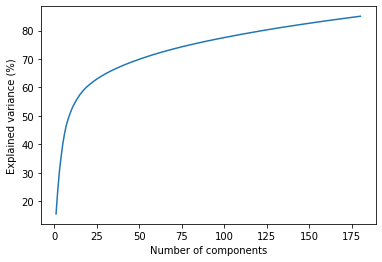

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [ ]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.0060102  0.00766909 0.00375772 ... 0.00248523 0.00102569 0.00217982]
 [0.00014954 0.0049399  0.00740172 ... 0.00246518 0.00327981 0.00218796]
 [0.00338275 0.00212554 0.00658443 ... 0.00585654 0.00253157 0.00518321]
 ...
 [0.00089535 0.00293249 0.00220884 ... 0.00298478 0.00203532 0.00690179]
 [0.00504971 0.00031406 0.00553674 ... 0.00075784 0.01516344 0.00249541]
 [0.00132746 0.00166147 0.00736118 ... 0.00286096 0.00238286 0.00297801]]


In [ ]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

# Call function to create importance df
importance_df  =create_importance_dataframe(pca, X)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 features are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 features are \n')
display(pc2_top_10_features )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180
1007_s_at,0.006010,0.000150,0.003383,0.005572,0.003134,0.001964,0.011457,0.005203,0.001209,0.000899,...,0.000668,0.000317,0.001384,0.004569,0.000713,0.002695,0.002483,0.000895,0.005050,0.001327
1053_at,0.007669,0.004940,0.002126,0.001143,0.002320,0.005855,0.006166,0.002392,0.001312,0.004729,...,0.000641,0.002877,0.004072,0.003606,0.000937,0.000836,0.001776,0.002932,0.000314,0.001661
117_at,0.003758,0.007402,0.006584,0.003476,0.001003,0.003530,0.001361,0.003143,0.000354,0.003294,...,0.003798,0.000897,0.001831,0.002652,0.000840,0.005594,0.004371,0.002209,0.005537,0.007361
121_at,0.004270,0.002535,0.004378,0.003328,0.007492,0.000344,0.007641,0.004260,0.004846,0.005834,...,0.008671,0.005317,0.004890,0.003379,0.007548,0.003336,0.001543,0.000786,0.001176,0.003214
1255_g_at,0.003209,0.002558,0.004690,0.003559,0.001693,0.004393,0.006588,0.001488,0.001619,0.000252,...,0.003154,0.003289,0.006546,0.009528,0.000221,0.006418,0.003288,0.000742,0.001087,0.001401



PC1 top 10 features are 



217376_at      0.009452
210577_at      0.009372
203138_at      0.009350
209786_at      0.009339
240630_at      0.009307
200777_s_at    0.009278
215527_at      0.009267
221347_at      0.009259
233656_s_at    0.009251
1561446_at     0.009220
241202_at      0.009211
1569001_at     0.009193
208390_s_at    0.009183
1562239_at     0.009181
1556797_at     0.009180
1559995_at     0.009165
200943_at      0.009159
226329_s_at    0.009149
224062_x_at    0.009146
1553279_at     0.009143
Name: PC1, dtype: float64


PC2 top 10 features are 



234982_at      0.012096
200816_s_at    0.012036
211034_s_at    0.011965
213118_at      0.011790
228680_at      0.011755
219549_s_at    0.011749
235747_at      0.011742
212308_at      0.011633
203156_at      0.011586
230029_x_at    0.011575
203097_s_at    0.011560
1552789_at     0.011469
224471_s_at    0.011461
235360_at      0.011455
203909_at      0.011445
226269_at      0.011441
218306_s_at    0.011420
212779_at      0.011398
225313_at      0.011392
225352_at      0.011355
Name: PC2, dtype: float64

In [ ]:
type(pc1_top_10_features)

pandas.core.series.Series

In [ ]:
pc1_top = pd.DataFrame({'probes':pc1_top_10_features.index, 'importance':pc1_top_10_features.values})
pc1_top

,probes,importance
0,217376_at,9.452008e-03
1,210577_at,9.372066e-03
2,203138_at,9.349717e-03
3,209786_at,9.339031e-03
4,240630_at,9.307062e-03
...,...,...
54670,243090_at,5.377534e-07
54671,1565406_a_at,5.032538e-07
54672,1560493_a_at,4.425125e-07
54673,229247_at,3.843207e-07


In [ ]:
print('Top 20 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 20 values in each row
    temp = np.argpartition(-(pca_components[row]), 20)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:20]
    
    # print the top 20 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 20 most important features in each component
Component 0: ['217375_at', '210576_at', '203137_at', '209785_s_at', '240629_at', '200776_s_at', '215526_at', '221346_at', '233655_s_at', '1561445_at', '241201_at', '1568999_at', '208389_s_at', '1562238_at', '1556796_at', '1559993_at', '200942_s_at', '226328_at', '224061_at', '1553277_at']
Component 1: ['234981_x_at', '200815_s_at', '211033_s_at', '213117_at', '228679_at', '219548_at', '235746_s_at', '212307_s_at', '203155_at', '230028_at', '203096_s_at', '1552788_a_at', '224470_at', '235359_at', '203908_at', '226268_at', '218305_at', '212778_at', '225312_at', '225351_at']
Component 2: ['226515_at', '221237_s_at', '232739_at', '239544_at', '240445_at', '1553691_at', '202008_s_at', '229269_x_at', '235155_at', '32836_at', '205707_at', '241541_at', '235510_at', '237950_s_at', '229350_x_at', '217690_at', '222482_at', '220997_s_at', '230632_at', '1558346_at']
Component 3: ['243266_at', '1569006_at', '225708_at', '231681_x_at', '227937_at', '20

In [ ]:
print('Top 20 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 20 values in each row
    temp = np.argpartition(-(pca_components[row]), 20)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:20]
    
    # print the top 20 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Component 178: ['207147_at', '1552477_a_at', '234138_at', '243131_x_at', '240422_at', '241193_at', '236951_at', '1555282_a_at', '239957_at', '201980_s_at', '1553930_at', '211509_s_at', '207108_s_at', '223943_s_at', '230553_at', '207480_s_at', '215751_at', '207736_s_at', '231013_at', '241010_x_at', '1568870_at', '237929_at', '210935_s_at', '241329_s_at', '231530_s_at', '1558930_at', '243292_at', '228365_at', '1569543_at', '244807_at', '1557763_at', '240026_x_at', '205308_at', '1552584_at', '229185_at', '240054_at', '1554185_at', '221991_at', '1563131_at', '214209_s_at', '231767_at', '216916_s_at', '240928_at', '225790_at', '227135_at', '214152_at', '216897_s_at', '1555434_a_at', '237390_at', '215462_at', '242321_at', '233412_x_at', '220324_at', '224290_at', '206842_at', '244093_at', '1562086_at', '1568739_at', '1556472_s_at', '1555344_at', '242146_at', '206794_at', '217272_s_at', '1562742_at', '214388_at', '224225_s_at', '1569032_at', '1566269_at', '231687_at', '1554472_a_at', '242134_a

In [ ]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(471, 180)
[[-6.14840748e+01 -4.30722733e+01 -2.22549253e+01 ... -3.06011180e-02
  -4.29566868e-01  7.07200596e+00]
 [-9.34488553e+01  1.52836589e+01 -2.45547969e+01 ...  1.31148973e+00
   8.43493335e-01  2.91776519e+00]
 [ 1.14018190e+02 -1.91144814e+01  2.35518807e+01 ... -2.53588730e+00
   3.53812560e+00  3.33544808e+00]
 ...
 [ 4.36060821e+00 -2.72874864e+01 -2.65952796e+01 ...  4.60092280e+00
   1.68798065e+00 -3.50842754e-01]
 [ 2.30444163e+02  8.12547472e+01 -1.03059169e+02 ... -1.40943085e+00
   6.05512348e-01 -7.08575338e+00]
 [ 1.28140997e+02  1.91078381e+02 -5.36749135e+01 ... -6.48163629e+00
  -1.10096967e+00 -3.78774392e+00]]


In [ ]:
col=["disease:ch1"]
from sklearn.preprocessing import OneHotEncoder
df_new=pd.get_dummies(df,columns=col)
df_new

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,disease:ch1_0.0,disease:ch1_1.0,disease:ch1_2.0,disease:ch1_3.0
GSM2899178,13.351463,8.384527,7.25765,9.693855,4.757011,9.564984,7.20268,6.469576,5.433951,5.812061,...,5.161074,4.822047,4.427799,4.322635,4.65894,4.88583,1,0,0,0
GSM2899179,13.029612,8.711418,7.288016,9.419995,4.779778,8.70894,6.926967,6.727661,5.516571,5.477696,...,5.100207,4.832563,4.242714,4.248731,4.698449,4.827256,1,0,0,0
GSM2899180,12.204373,7.60735,7.502815,9.766347,4.667598,7.765518,7.213711,6.380055,5.130731,6.366044,...,5.467172,5.113913,4.44973,4.363435,4.825065,4.861275,1,0,0,0
GSM2899181,13.220731,8.565974,7.091462,9.696563,4.851953,8.421737,6.940979,6.702834,4.921485,5.206217,...,5.20009,4.863638,4.330211,4.374541,4.738313,4.91411,1,0,0,0
GSM2899182,12.800696,8.153348,7.145189,9.541857,4.681551,8.848753,6.975687,6.003315,4.979548,6.252752,...,5.311042,4.868711,4.386464,4.430018,4.721205,4.765831,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2899722,13.022445,8.613445,7.92347,9.490949,4.762489,9.02707,6.904685,6.480265,6.880781,5.461936,...,5.285959,4.829299,4.417894,4.25702,4.74546,5.029712,0,1,0,0
GSM2899723,12.951104,8.464073,8.176689,9.451931,4.69994,8.431166,6.960206,6.331347,6.832752,5.582707,...,5.258645,4.87616,4.276804,4.369978,4.664675,4.884514,0,1,0,0
GSM2899724,12.83366,8.555682,7.325877,9.631344,4.965802,8.443478,6.898079,6.182194,5.077613,5.185123,...,5.341722,4.947466,4.355065,4.244847,4.650228,4.709607,0,1,0,0
GSM2899725,11.870599,7.531668,7.183132,9.411834,5.194529,7.380941,7.419895,6.199073,5.331215,5.790697,...,5.47614,5.038935,4.521768,4.349592,4.679202,5.076354,0,1,0,0


In [ ]:
df_new['disease:ch1_0.0']

GSM2899178    1
GSM2899179    1
GSM2899180    1
GSM2899181    1
GSM2899182    1
             ..
GSM2899722    0
GSM2899723    0
GSM2899724    0
GSM2899725    0
GSM2899726    0
Name: disease:ch1_0.0, Length: 471, dtype: uint8

In [ ]:
y_new= df_new[['disease:ch1_0.0','disease:ch1_1.0','disease:ch1_2.0','disease:ch1_3.0']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_multilabel_classification
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline


xtrain, xtest, ytrain, ytest=train_test_split(X_pca, y_new, train_size=0.6, random_state=88)
print(len(xtest)) 

189


In [ ]:
classifier = MultiOutputClassifier(XGBClassifier())
clf = Pipeline([('classify', classifier)
               ])
print (clf)


clf.fit(xtrain, ytrain)
print(clf.score(xtrain, ytrain))

yhat = clf.predict(xtest)

Pipeline(steps=[('classify', MultiOutputClassifier(estimator=XGBClassifier()))])
1.0


In [ ]:
clf.score(xtrain, ytrain)

1.0

In [ ]:
yhat

array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 1,

In [ ]:
auc_y1 = roc_auc_score(ytest,yhat)
auc_y1

0.6667484766644987

In [ ]:
cr_y1 = classification_report(ytest,yhat,)

print (cr_y1)

              precision    recall  f1-score   support

           0       0.57      0.26      0.36        61
           1       0.74      0.71      0.72        94
           2       0.40      0.67      0.50         6
           3       1.00      0.07      0.13        28

   micro avg       0.68      0.47      0.56       189
   macro avg       0.68      0.43      0.43       189
weighted avg       0.71      0.47      0.51       189
 samples avg       0.46      0.47      0.46       189



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
df['pca-one'] = X_pca[:,0]
df['pca-two'] = X_pca[:,1] 
df['pca-three'] = X_pca[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

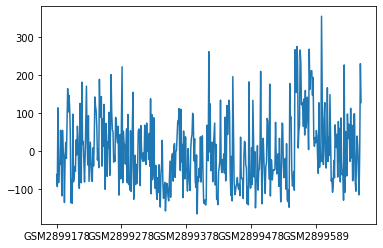

In [ ]:
df['pca-one'].plot()

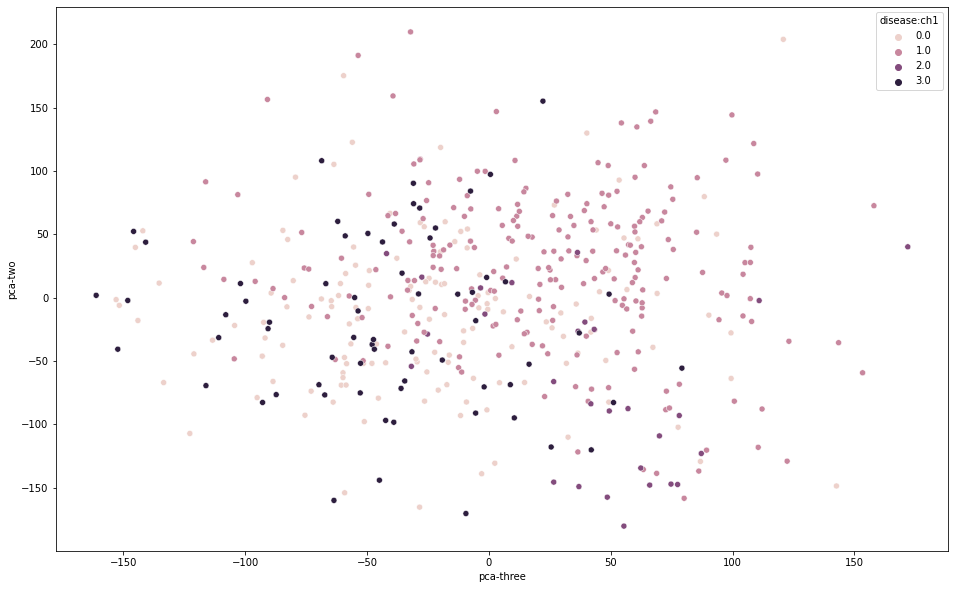

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df['pca-three'], y=df['pca-two'],
    hue=df['disease:ch1'],
    data=X_pca,
    legend="full",
)

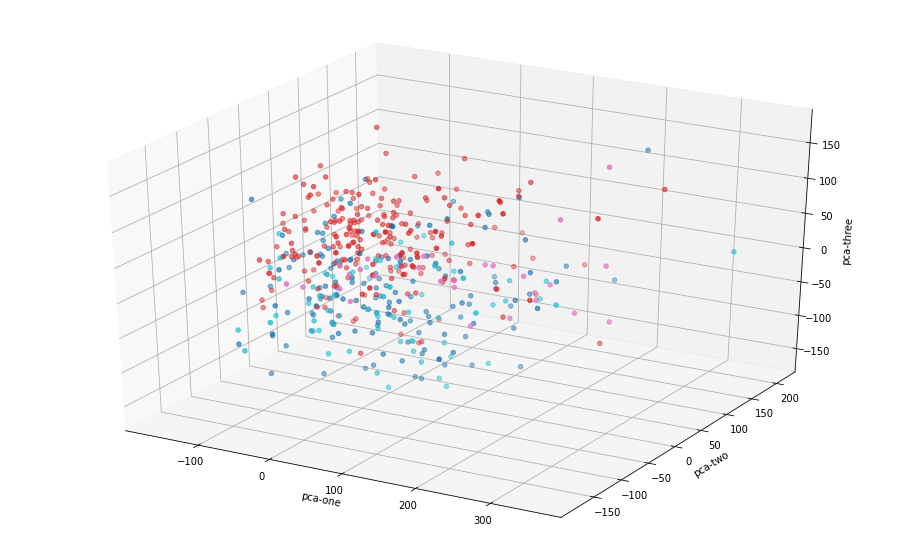

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    zs=df['pca-three'] ,
    xs=df['pca-one'], 
    ys=df['pca-two'] ,
    c=df['disease:ch1'], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(X_pca)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 1.4535608291625977 seconds


In [ ]:
tsne_pca_results.shape

(471, 2)

In [ ]:
df['tse-one'] = tsne_pca_results[:,0]
df['tse-two'] = tsne_pca_results[:,1] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


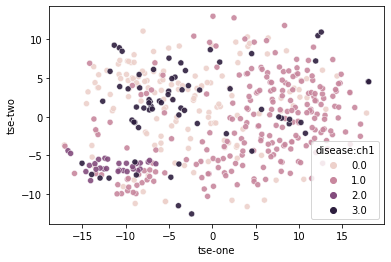

In [ ]:
sns.scatterplot(
    x=df['tse-one'], y=df['tse-two'],
    hue=df['disease:ch1'],
    data=df,
    legend="full",
    alpha=0.9,
)

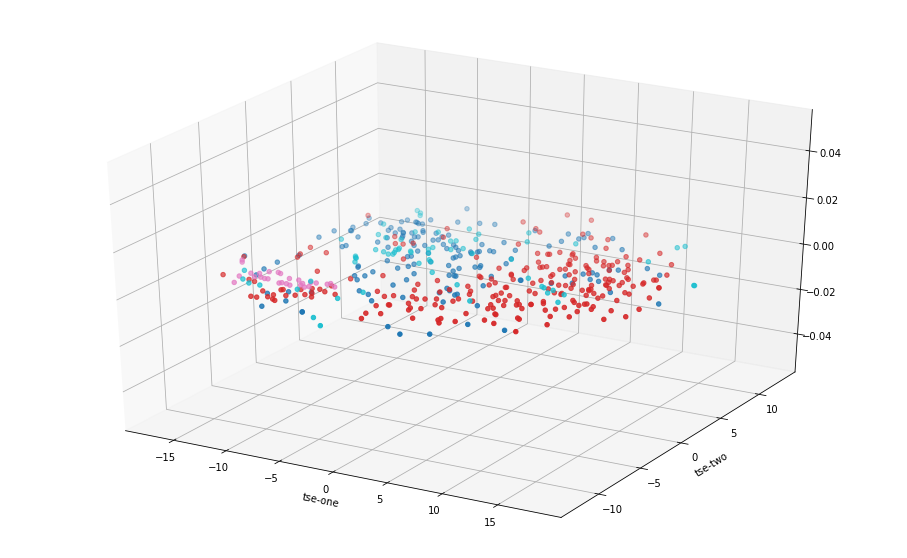

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df['tse-one'] ,
    ys=df['tse-two'],
    c=df['disease:ch1'], 
    cmap='tab10'
)
ax.set_xlabel('tse-one')
ax.set_ylabel('tse-two')
plt.show()

In [ ]:
time_start = time.time()
umap = umap.UMAP(n_components=2, verbose=0)
umap_pca_results = umap.fit_transform(X_pca)
print('uMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

uMAP done! Time elapsed: 10.412100553512573 seconds


In [ ]:
umap_pca_results.shape

(471, 2)

In [ ]:
df['umap-one'] = umap_pca_results[:,0]
df['umap-two'] = umap_pca_results[:,1] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


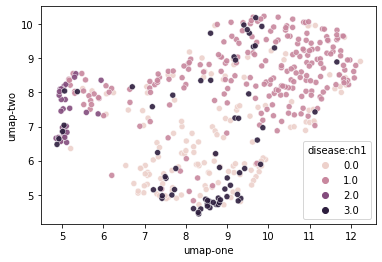

In [ ]:
sns.scatterplot(
    x=df['umap-one'], y=df['umap-two'],
    hue=df['disease:ch1'],
    data=df,
    legend="full",
    alpha=0.9,
)

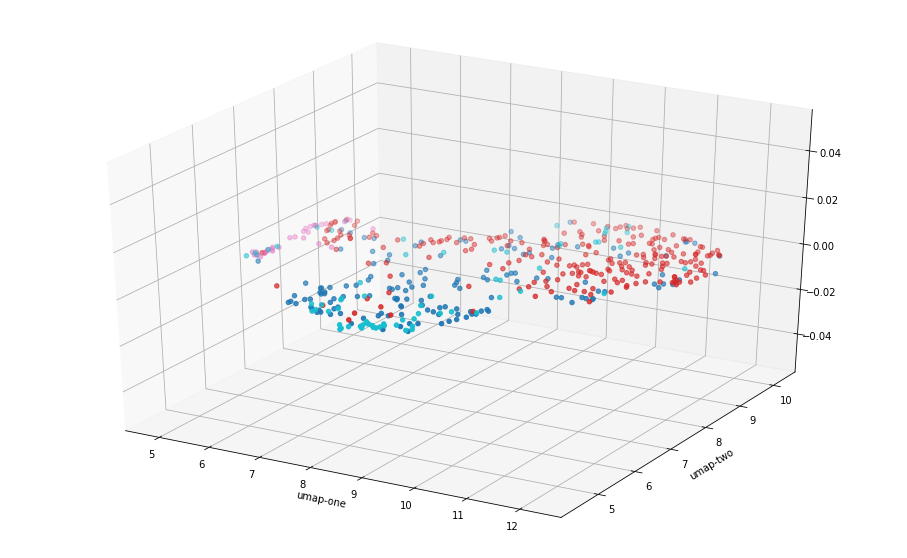

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df['umap-one'] ,
    ys=df['umap-two'],
    c=df['disease:ch1'], 
    cmap='tab10'
)
ax.set_xlabel('umap-one')
ax.set_ylabel('umap-two')
plt.show()